# Summary:

#### In this notebook, the trial runs from the preceding notebook ('01_So_What.ipynb') are systematically extended to try to find an optimal configuration for the two models. The model parameters to be fine tuned are: number of epochs, number of layers and the number of units.

#### The best performing model configuration will be used in the notebook '03_Blue_in_Green.ipynb' to analyze the impact of adding noise to the clean dataset.


# Table of contents
* [1. Load modules](#Part1_link)
* [2. Setup data](#Part2_link)
<br >&nbsp;&nbsp;&nbsp;[2.1  Clean data](#Part2.1_link)
<br >&nbsp;&nbsp;&nbsp;[2.2  Add noise](#Part2.2_link)
* [3. Setup models and evaluate for various hyper-parameter choices](#Part3_link)
<br >&nbsp;&nbsp;&nbsp;[3.1 Compile and fit LSTM and RNN model](#Part3.1_link)
* [4. Visualize results](#Part4_link)

<a id='Part1_link'></a>
# 1. Load modules

In [36]:
import sys
sys.path.append("../src/")
import Kind_of_Blue  # own class with a collection of methods used in this analysis

import tensorflow as tf

import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

import numpy as np
import pandas as pd


<a id='Part2_link'></a>
# 2. Setup data

<a id='Part2.1_link'></a>
### 2.1 Clean data + noise

number of observations in time series: 1820


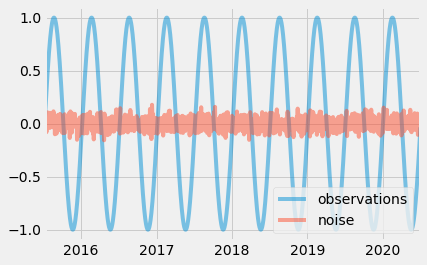

In [37]:
# set a range of dates on which the observations are made
idx = pd.date_range(end='7/1/2020', periods=5*364, freq='d')

# take a sine function as the observations
num_periods = 10  # number of sine periods
observations = [np.sin(2*np.pi*num_periods*x/len(idx)) for x in range(len(idx))]

# generate Gaussian noise

std = 0.05
mean = 0.0
noise = [np.random.normal(loc=mean, scale=std, size=None) for x in range(len(idx))]
print('number of observations in time series: {}'.format(len(observations)))

# initialize dataframe to store time series
df = pd.DataFrame(data={'observations': observations, 'noise': noise})
df.index = idx

df.plot(alpha=0.5)

The following steps are repeated from the previous notebook, '01_So_What.ipynb', and are grouped into one single step here for simplicity.

In [38]:
# initialize object
mdq = Kind_of_Blue.Kind_of_Blue()

# load dataframe into object
mdq._selected_features = ['observations', 'noise']
mdq.df = df

# train-validation split ratio as class attribute set to 70%
print('train split ratio = ', mdq.TRAIN_SPLIT_RATIO)

# initialize dataset from dataframe 
mdq.initialize_dataset()
print('loaded data set length: {}'.format(len(mdq._dataset)))

# standardize data
mdq.standardize_data()

# check that mean equals zero and the standard deviation is one
print('mean: {}, std: {}'.format(round(np.mean(mdq._dataset), 2), round(np.std(mdq._dataset), 2)))

# set number of time points for 1/ future forecasting points and 2/ the past, historical time points
future_target_size = int(365/52)
past_history_size = int(1*365)

# set batch size
batch_size = 32

# generate train and validation data
mdq.generate_train_and_val_data(future_target_size=future_target_size, past_history_size=past_history_size
                                , batch_size=batch_size)

print('number of training samples: {}'.format(mdq._num_samples))

train split ratio =  0.7
loaded data set length: 1820
mean: 0.01, std: 1.0
debug3: check what buffer_size actually does! and why is data shape always (..., ..., 1) <- 1???
training set shape: x:(909, 365, 2), y:(909, 7, 2)
validation set shape: x:(174, 365, 2), y:(174, 7, 2)
number of training samples: 909


<a id='Part3_link'></a>
# 3. Compile and fit models

<a id='Part3.1_link'></a>
### 3.1 RNN

In [ ]:
model_types = ['RNN']

# set number of steps per epoch
num_samples = mdq._num_samples
steps_per_epoch = int(num_samples/future_target_size)
validation_steps = int(steps_per_epoch/2)


<a id='Part4_link'></a>
# 4. update